In [1]:
import pandas as pd
import numpy as np

In [2]:
NC = open('all_NClengths.txt', 'r')

In [3]:
ls1 = []
ls2 = []
ls3 = []
dict = {}

In [4]:
with open('all_NClengths.txt', 'r') as file:
    for line in file:
        if 'NC.' in line:
            ls1.append(line.replace("\n", "").split('.')[1])
            ls3.append(ls2)
            ls2 = []
        if 'NC_' in line:
            helper = line.replace("\n", "")
            ls2.append({helper.split(':')[0]:int(helper.split(':')[1])})

In [5]:
ls3.append(ls2)

In [6]:
ls3 = ls3[1:]

In [7]:
ls1

['Abras_virus',
 'Abu_Hammad_virus',
 'Abu_Mina_virus',
 'Abutilon_Brazil_virus',
 'Abutilon_golden_mosaic_Yucatan_virus',
 'Acara_virus',
 'Actinidia_chlorotic_ringspot-associated_virus',
 'Actinovirus_bernense',
 'Adana_virus',
 'Aedes_camptorhynchus_reo-like_virus',
 'Aeonium_ringspot_virus',
 'Aeropyrum_pernix_bacilliform_virus_1',
 'African_cassava_mosaic_Burkina_Faso_virus',
 'Ageratum_latent_virus_1998',
 'Ageratum_yellow_vein_China_alphasatellite',
 'Ageratum_yellow_vein_China_virus_-_[Hn2]',
 'Ageratum_yellow_vein_Hualian_virus',
 'Ageratum_yellow_vein_Sri_Lanka_virus',
 'Ageratum_yellow_vein_virus',
 'Aguacate_virus',
 'Aino_virus',
 'Akabane_virus',
 'Alajuela_virus',
 'Alcube_virus',
 'Alenquer_virus',
 'Alfamovirus_AMV',
 'Allamanda_leaf_mottle_distortion_virus',
 'Alphachrysovirus_cerasi',
 'Alstroemeria_necrotic_streak_virus',
 'Alstroemeria_yellow_spot_virus',
 'Alternaria_alternata_chrysovirus_1',
 'Alternaria_alternata_virus_1',
 'Alxa_virus',
 'Amapari_virus',
 'Ambe

In [8]:
dict

{}

In [9]:
len(ls1)

1507

In [10]:
len(ls3)

1507

In [11]:
for i in range(len(ls1)):
    dict[ls1[i]] = ls3[i]

In [12]:
dict['surrounding_non-legume_associated_virus']

[{'NC_079041.1': 6775}, {'NC_079042.1': 5291}]

In [13]:
#np.mean(list(dict['surrounding_non-legume_associated_virus'].values())) 

In [14]:
len(dict['Abras_virus'])

3

In [15]:
dict['Abras_virus']

[{'NC_077940.1': 4777}, {'NC_077941.1': 6901}, {'NC_077942.1': 1073}]

In [16]:
sum = 0
for i in dict['Abras_virus']:
    sum += (list(i.values()))[0]

In [17]:
number_list = []
avg_lengths = []
std = []
help = []
counter = 0
for i in dict:
    help = []
    helper = len(dict[i])
    number_list.append(helper)
    sum = 0
    for j in dict[i]:
        sum += (list(j.values()))[0]
        help.append((list(j.values()))[0])
    avg_lengths.append(sum/number_list[counter])
    std.append(np.std(help))
    counter +=1

In [18]:
number_list[0]

3

In [19]:
len(number_list)

1507

In [20]:
dict2 = {}
for i in range(len(ls1)):
    dict2[ls1[i]] = [number_list[i], avg_lengths[i], std[i]]

In [21]:
final = pd.DataFrame(dict2)

In [22]:
final

,Abras_virus,Abu_Hammad_virus,Abu_Mina_virus,Abutilon_Brazil_virus,Abutilon_golden_mosaic_Yucatan_virus,Acara_virus,Actinidia_chlorotic_ringspot-associated_virus,Actinovirus_bernense,Adana_virus,Aedes_camptorhynchus_reo-like_virus,...,hymenopteran_phasma-related_virus_OKIAV227,hymenopteran_phasma-related_virus_OKIAV228,hymenopteran_phasma-related_virus_OKIAV250,hymenopteran_phasma-related_virus_OKIAV252,line2,morning_glory_varicosavirus,ncbi_dataset,pineapple_secovirus_B,red_goblin_roach_virus_1,surrounding_non-legume_associated_virus
0,3.000000,3.000000,3.000000,2.0,1.0,3.000000,5.000000,3.000000,3.000000,4.000000,...,3.000000,3.00000,3.000000,3.000000,3.000000,2.0,3.000000,2.0,3.000000,2.0
1,4250.333333,6198.666667,6138.666667,2635.5,2629.0,4170.333333,2829.200000,4203.666667,4129.666667,3502.250000,...,3570.000000,3578.00000,4106.000000,4138.333333,3906.000000,5848.5,3906.000000,4882.0,7032.000000,6033.0
2,2408.239929,4351.927415,4433.832829,17.5,0.0,2411.329693,2132.524457,1631.929805,1899.653536,682.618625,...,1963.391114,1972.22159,2087.593032,2030.034866,1946.559187,560.5,1946.559187,1074.0,4166.560772,742.0


In [23]:
final = final.transpose()

In [24]:
final = final.rename(columns={0: "segments", 1: "length", 2: 'std'})

In [25]:
final['segments'].describe()

count    1507.000000
mean        3.262110
std         3.953201
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max       105.000000
Name: segments, dtype: float64

In [26]:
final['length'].describe()

count      1507.000000
mean       3746.459883
std        4133.158714
min         540.000000
25%        2597.250000
50%        2965.333333
75%        4228.666667
max      111751.000000
Name: length, dtype: float64

In [27]:
final['std'].describe()

count    1507.000000
mean     1166.490021
std      1158.429709
min         0.000000
25%        28.750000
50%       938.959605
75%      1980.248313
max      8575.831368
Name: std, dtype: float64

In [28]:
final

,segments,length,std
Abras_virus,3.0,4250.333333,2408.239929
Abu_Hammad_virus,3.0,6198.666667,4351.927415
Abu_Mina_virus,3.0,6138.666667,4433.832829
Abutilon_Brazil_virus,2.0,2635.500000,17.500000
Abutilon_golden_mosaic_Yucatan_virus,1.0,2629.000000,0.000000
...,...,...,...
morning_glory_varicosavirus,2.0,5848.500000,560.500000
ncbi_dataset,3.0,3906.000000,1946.559187
pineapple_secovirus_B,2.0,4882.000000,1074.000000
red_goblin_roach_virus_1,3.0,7032.000000,4166.560772


In [29]:
dict

{'Abras_virus': [{'NC_077940.1': 4777},
  {'NC_077941.1': 6901},
  {'NC_077942.1': 1073}],
 'Abu_Hammad_virus': [{'NC_078146.1': 12117},
  {'NC_078147.1': 1777},
  {'NC_078148.1': 4702}],
 'Abu_Mina_virus': [{'NC_078149.1': 4441},
  {'NC_078150.1': 12215},
  {'NC_078151.1': 1760}],
 'Abutilon_Brazil_virus': [{'NC_014138.1': 2653}, {'NC_014139.1': 2618}],
 'Abutilon_golden_mosaic_Yucatan_virus': [{'NC_038438.1': 2629}],
 'Acara_virus': [{'NC_078977.1': 6901},
  {'NC_078978.1': 4574},
  {'NC_078979.1': 1036}],
 'Actinidia_chlorotic_ringspot-associated_virus': [{'NC_038769.1': 7061},
  {'NC_038770.1': 2267},
  {'NC_038771.1': 1664},
  {'NC_038772.1': 1678},
  {'NC_038773.1': 1476}],
 'Actinovirus_bernense': [{'NC_055638.1': 3804},
  {'NC_055639.1': 2435},
  {'NC_055640.1': 6372}],
 'Adana_virus': [{'NC_029127.1': 6405},
  {'NC_029128.1': 4229},
  {'NC_029129.1': 1755}],
 'Aedes_camptorhynchus_reo-like_virus': [{'NC_035216.1': 4052},
  {'NC_035217.1': 2555},
  {'NC_035222.1': 4242},
  {'NC

In [30]:
import csv
with open('allviruslength.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in dict.items():
       writer.writerow([key, value])

In [31]:
final.to_csv('virus_stats.csv', index=True)  

In [32]:
final.sort_values(by=['length'])

,segments,length,std
Bracoviriform_nigricipitis,2.0,540.000000,73.000000
Frijoles_virus_VP-161A,3.0,602.000000,128.096318
Parsley_severe_stunt_associated_virus,7.0,964.714286,6.942916
Pea_yellow_stunt_virus,8.0,978.125000,9.854409
Sophora_yellow_stunt_virus,8.0,986.625000,6.421400
...,...,...,...
Atrato_Chu-like_virus_5,1.0,13163.000000,0.000000
Bracoviriform_congregatae,30.0,18922.333333,8283.769003
Escherichia_phage_LM33_P1,1.0,38979.000000,0.000000
Pseudomonas_phage_VCM,1.0,98765.000000,0.000000


In [33]:
dict['Escherichia_phage_slur09']

[{'NC_028840.1': 111751}]

In [34]:
dict['Pseudomonas_phage_VCM']

[{'NC_029065.1': 98765}]

In [35]:
final.describe()

,segments,length,std
count,1507.000000,1507.000000,1507.000000
mean,3.262110,3746.459883,1166.490021
std,3.953201,4133.158714,1158.429709
min,1.000000,540.000000,0.000000
25%,2.000000,2597.250000,28.750000
50%,2.000000,2965.333333,938.959605
75%,3.000000,4228.666667,1980.248313
max,105.000000,111751.000000,8575.831368


In [36]:
count_sravan = final['segments'].value_counts().get(1)

In [37]:
count_sravan

178

In [38]:
final.loc[final['segments']==1].describe()

,segments,length,std
count,178.0,178.000000,178.0
mean,1.0,4360.679775,0.0
std,0.0,11228.650902,0.0
min,1.0,1022.000000,0.0
25%,1.0,2652.500000,0.0
50%,1.0,2743.500000,0.0
75%,1.0,2760.000000,0.0
max,1.0,111751.000000,0.0


In [39]:
import seaborn 

In [40]:
final['length']

Abras_virus                                4250.333333
Abu_Hammad_virus                           6198.666667
Abu_Mina_virus                             6138.666667
Abutilon_Brazil_virus                      2635.500000
Abutilon_golden_mosaic_Yucatan_virus       2629.000000
                                              ...     
morning_glory_varicosavirus                5848.500000
ncbi_dataset                               3906.000000
pineapple_secovirus_B                      4882.000000
red_goblin_roach_virus_1                   7032.000000
surrounding_non-legume_associated_virus    6033.000000
Name: length, Length: 1507, dtype: float64

<Axes: xlabel='length', ylabel='Density'>

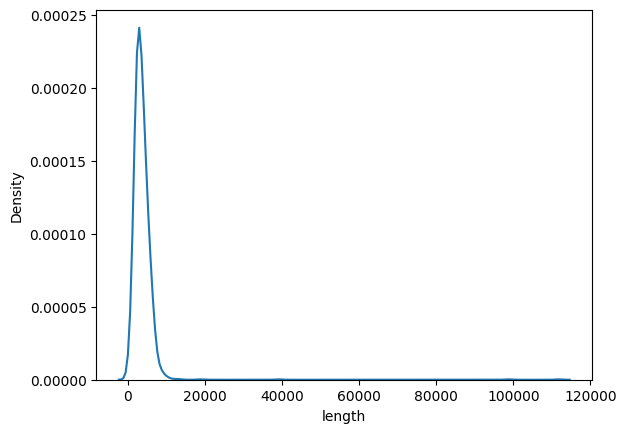

In [41]:
seaborn.kdeplot(final['length'])

<Axes: xlabel='segments', ylabel='Density'>

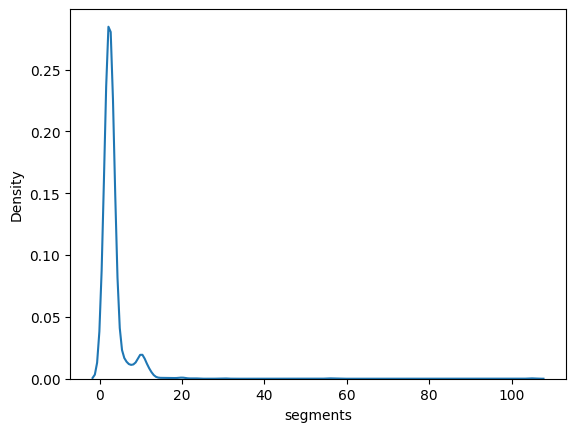

In [42]:
seaborn.kdeplot(final['segments'])

In [43]:
final.loc[final['length']>20000]

,segments,length,std
Escherichia_phage_LM33_P1,1.0,38979.0,0.0
Escherichia_phage_slur09,1.0,111751.0,0.0
Pseudomonas_phage_VCM,1.0,98765.0,0.0


In [44]:
final

,segments,length,std
Abras_virus,3.0,4250.333333,2408.239929
Abu_Hammad_virus,3.0,6198.666667,4351.927415
Abu_Mina_virus,3.0,6138.666667,4433.832829
Abutilon_Brazil_virus,2.0,2635.500000,17.500000
Abutilon_golden_mosaic_Yucatan_virus,1.0,2629.000000,0.000000
...,...,...,...
morning_glory_varicosavirus,2.0,5848.500000,560.500000
ncbi_dataset,3.0,3906.000000,1946.559187
pineapple_secovirus_B,2.0,4882.000000,1074.000000
red_goblin_roach_virus_1,3.0,7032.000000,4166.560772


# Reduced segmented viruses

In [134]:
red = final.loc[final['length']<20000]

In [135]:
red3 = red.loc[red['segments']!=1]

<Axes: xlabel='length', ylabel='Density'>

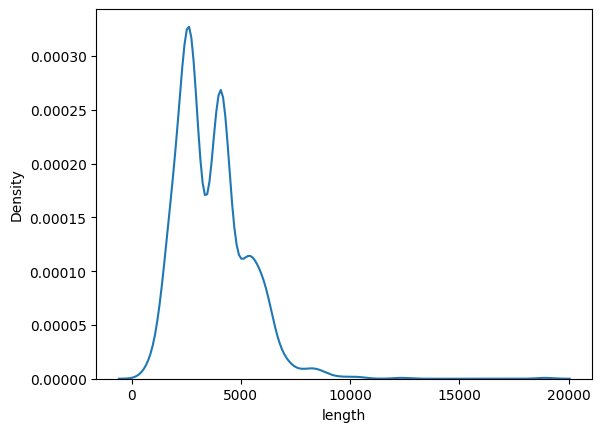

In [136]:
seaborn.kdeplot(red3['length'])

In [137]:
red3.describe()

,segments,length,std
count,1329.000000,1329.000000,1329.000000
mean,3.565087,3664.194163,1322.724200
std,4.116399,1584.524053,1146.743263
min,2.000000,540.000000,0.000000
25%,2.000000,2586.000000,211.888385
50%,3.000000,3570.000000,1155.168813
75%,3.000000,4307.666667,2105.375976
max,105.000000,18922.333333,8575.831368


In [138]:
red3.sort_values(by=['length'])

,segments,length,std
Bracoviriform_nigricipitis,2.0,540.000000,73.000000
Frijoles_virus_VP-161A,3.0,602.000000,128.096318
Parsley_severe_stunt_associated_virus,7.0,964.714286,6.942916
Pea_yellow_stunt_virus,8.0,978.125000,9.854409
Sophora_yellow_stunt_virus,8.0,986.625000,6.421400
...,...,...,...
South_Bay_virus,2.0,9714.000000,4178.000000
Osedax_japonicus_RNA_virus_1,2.0,10173.000000,2997.000000
Ichnoviriform_sonorense,23.0,10460.695652,3401.911859
Bracoviriform_demolitoris,15.0,12348.066667,7143.314380


In [139]:
red3.sort_values(by=['segments'])

,segments,length,std
Mammarenavirus_guanaritoense,2.0,5212.000000,1869.000000
Mungbean_yellow_mosaic_virus,2.0,2699.000000,24.000000
Nephila_clavipes_virus_6,2.0,3338.500000,721.500000
Nodamura_virus,2.0,2270.000000,934.000000
Norway_phlebovirus_1,2.0,4605.000000,2109.000000
...,...,...,...
Maize_rough_dwarf_virus,20.0,2914.450000,901.818800
Ichnoviriform_sonorense,23.0,10460.695652,3401.911859
Bracoviriform_congregatae,30.0,18922.333333,8283.769003
Ichnoviriform_fugitivi,56.0,4394.500000,1046.599750


In [140]:
red3['segments'].sum()

4738.0

In [141]:
#total segments is 4738 after removing >20,000 and removing single segments

In [130]:
ls2 = []
for i in dict.values():
    counter = 0
    for j in i:
        counter+=1
        ls2.append(*j.values())
    if counter == 1:
        ls2 = ls2[:-1]

In [132]:
ls2[:] = [x for x in ls2 if x <= 20000]

In [133]:
len(ls2)

4725

<Axes: ylabel='Density'>

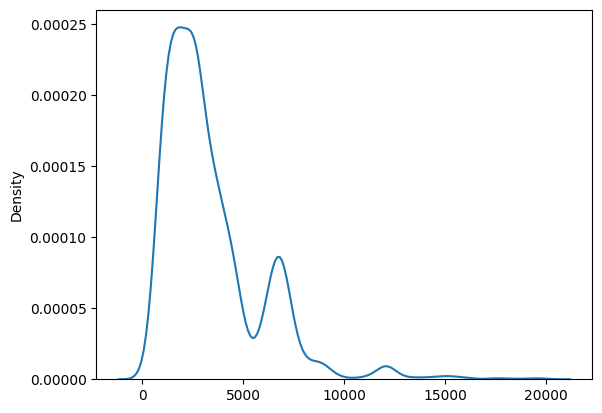

In [143]:
seaborn.kdeplot(ls2)

In [144]:
np.mean(ls2)

3404.2560846560846

In [145]:
np.std(ls2)

2445.607088679297

In [146]:
np.max(ls2)

19820

In [142]:
#look at without removing singles

In [103]:
ls = []
for i in dict.values():
    for j in i:
            ls.append(*j.values())

In [104]:
len(ls)

4916

In [105]:
ls[:] = [x for x in ls if x <= 20000]

In [107]:
len(ls)

4900

<Axes: ylabel='Density'>

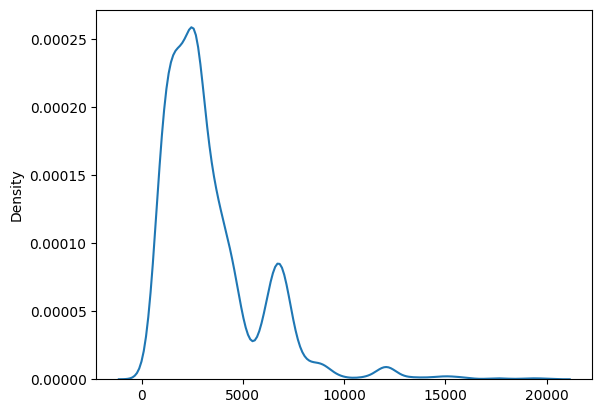

In [108]:
seaborn.kdeplot(ls)

In [109]:
np.mean(ls)

3390.166530612245

In [110]:
np.std(ls)

2417.6400409857874

In [111]:
np.max(ls)

19820

In [151]:
ls2.sort(reverse =True)

In [152]:
ls2

[19820,
 19557,
 19503,
 19161,
 18768,
 17789,
 17677,
 17477,
 17355,
 16103,
 15959,
 15876,
 15812,
 15810,
 15510,
 15279,
 15230,
 15218,
 15158,
 15096,
 15058,
 14975,
 14854,
 14825,
 14579,
 14531,
 14489,
 14286,
 14159,
 13892,
 13704,
 13597,
 13486,
 13279,
 13170,
 12903,
 12682,
 12577,
 12550,
 12461,
 12336,
 12330,
 12303,
 12272,
 12255,
 12238,
 12229,
 12215,
 12189,
 12184,
 12184,
 12178,
 12170,
 12157,
 12157,
 12143,
 12143,
 12139,
 12133,
 12132,
 12117,
 12108,
 12104,
 12098,
 12081,
 12073,
 12065,
 12063,
 12049,
 12037,
 12030,
 12004,
 12003,
 12001,
 11980,
 11961,
 11943,
 11916,
 11854,
 11853,
 11852,
 11841,
 11827,
 11823,
 11823,
 11816,
 11806,
 11734,
 11563,
 11285,
 11238,
 11209,
 11186,
 10960,
 10790,
 10757,
 10223,
 9874,
 9760,
 9604,
 9549,
 9529,
 9495,
 9407,
 9391,
 9312,
 9155,
 9123,
 9096,
 9040,
 9010,
 8999,
 8985,
 8970,
 8965,
 8955,
 8919,
 8918,
 8917,
 8916,
 8914,
 8913,
 8912,
 8911,
 8911,
 8908,
 8905,
 8897,
 8893,


In [154]:
import scipy.stats as sp

In [155]:
sp.gaussian_kde(ls2)

In [156]:
fivek = 0
tenk = 0
fivtk = 0
twenk = 0
for i in ls2:
    if i < 5000:
        fivek+=1
    elif i < 10000:
        tenk +=1
    elif i <15000:
        fivtk +=1
    else:
        twenk +=1
print(fivek, tenk, fivtk, twenk)   

3844 784 76 21


In [157]:
print(fivek/len(ls2), tenk/len(ls2), fivtk/len(ls2), twenk/len(ls2))   

0.8135449735449736 0.16592592592592592 0.016084656084656083 0.0044444444444444444


In [165]:
ls = final.loc[final['length']>20000].index

In [171]:
ls2 = final.loc[final['segments'] == 1].index

SyntaxError: can't use starred expression here (2269725137.py, line 1)

In [168]:
ls

Index(['Escherichia_phage_LM33_P1', 'Escherichia_phage_slur09',
       'Pseudomonas_phage_VCM'],
      dtype='object')

In [188]:
'Pseudomonas_phage_VCM' in ls2

True

In [179]:
ls3 = []
for i in ls2:
    ls3.append(i)
for i in ls:
    ls3.append(i)

In [189]:
len(ls3)

181

In [183]:
remove = []
for i in ls3:
    for j in dir_list:
        if i in j:
            remove.append(j)
    

In [181]:
import os
# Get the list of all files and directories
path = "/Users/samklauer/GitHub/PawseySummer2024/segments/"
dir_list = os.listdir(path)

In [182]:
dir_list

['Wuhan_Fly_Virus_12.fna',
 'Potato_black_ringspot_virus2.fna',
 'Botryosphaeria_dothidea_chrysovirus_18.fna',
 'Emaravirus_cercidis5.fna',
 'Maize_rough_dwarf_virus15.fna',
 'morning_glory_varicosavirus2.fna',
 'Tobacco_yellow_crinkle_virus1.fna',
 'Mammarenavirus_bearense2.fna',
 'Dabieshan_tick_virus2.fna',
 'Green_River_chinook_virus3.fna',
 'Lake_Chad_virus4.fna',
 'Wuhan_Insect_virus_23.fna',
 'Jamestown_Canyon_virus2.fna',
 'Wenzhou_tapeworm_virus_11.fna',
 'Aspergillus_ochraceous_virus2.fna',
 'Chum_salmon_reovirus_CS3.fna',
 'Peruvian_horse_sickness_virus10.fna',
 'Hubei_myriapoda_virus_92.fna',
 'Bakau_virus1.fna',
 'University_of_Giessen_virus1.fna',
 'Saesbyeol_virus3.fna',
 'Coccinia_mosaic_Tamil_Nadu_virus1.fna',
 'Choristoneura_occidentalis_cypovirus_163.fna',
 'Zegla_virus1.fna',
 'Rice_ragged_stunt_virus9.fna',
 'Minatitlan_virus1.fna',
 'Emaravirus_tritici1.fna',
 'Orthohantavirus_khabarovskense2.fna',
 'Striped_jack_nervous_necrosis_virus1.fna',
 'Operophtera_brumata

In [185]:
len(remove)

182

In [190]:
remove

['Abutilon_golden_mosaic_Yucatan_virus1.fna',
 'Aeropyrum_pernix_bacilliform_virus_11.fna',
 'Ageratum_yellow_vein_China_alphasatellite1.fna',
 'Ageratum_yellow_vein_China_virus_-_[Hn2]1.fna',
 'Ageratum_yellow_vein_Sri_Lanka_virus1.fna',
 'Atrato_Chu-like_virus_51.fna',
 'Banana_virus_X1.fna',
 'Bean_chlorotic_mosaic_virus1.fna',
 'Bean_white_chlorosis_mosaic_virus1.fna',
 'Bean_yellow_mosaic_Mexico_virus1.fna',
 'Begomovirus_allamandae1.fna',
 'Begomovirus_alternantherae1.fna',
 'Bhendi_yellow_vein_Bhubhaneswar_virus1.fna',
 'Bhendi_yellow_vein_Delhi_virus_[2004:New_Delhi]1.fna',
 'Bhendi_yellow_vein_Haryana_virus_[2003:Karnal]1.fna',
 'Bhendi_yellow_vein_India_virus_[India:Dharwad_OYDWR2:2006]1.fna',
 'Boerhavia_yellow_spot_virus1.fna',
 'Cassava_mosaic_Madagascar_alphasatellite1.fna',
 'Centrosema_yellow_spot_virus1.fna',
 'Chaetoceros_socialis_forma_radians_RNA_virus_11.fna',
 'Chilli_leaf_curl_Gonda_virus1.fna',
 'Chilli_leaf_curl_virus-[Bhavanisagar:India:2010]1.fna',
 'Chino_de

In [191]:
with open("removal.txt", "w") as output:
    for i in remove:
       output.write(i + '\n') 